In [2]:
#本文使用一組來自耶魯大學的人臉資料檔（Yale Faces），共 2410 張人臉影像，
#每張大小為 192 × 168，含 38 人，每人約有 59-64 張人臉影像，每張略有不同，包括表情、光線等，
import numpy as np
import scipy.io
D = scipy.io.loadmat("allFaces.mat")
X = D["faces"] # each column represents an image #32256*2410
y = np.ndarray.flatten(D["nfaces"]) #38 #每個人臉的張數
m = int(D["m"]) #168
n = int(D["n"]) #192
#n_person = len(y)
n_persons = int(D["person"]) #38
print(D)
print(range(n_persons)) 

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Sep  4 19:53:55 2014', '__version__': '1.0', '__globals__': [], 'faces': array([[80, 94, 59, ...,  3,  4,  4],
       [81, 87, 67, ...,  4,  4,  3],
       [80, 88, 66, ...,  2,  4,  4],
       ...,
       [14,  7,  6, ...,  0,  1,  1],
       [14,  9,  6, ...,  1,  1,  0],
       [11,  8,  7, ...,  1,  1,  2]], dtype=uint8), 'n': array([[192]], dtype=uint8), 'm': array([[168]], dtype=uint8), 'sub': array([[(array([[39]], dtype=uint8), array([[70, 84, 88, ...,  3,  4,  4],
               [74, 83, 95, ...,  4,  4,  3],
               [69, 82, 97, ...,  2,  4,  4],
               ...,
               [ 1,  2,  3, ...,  0,  1,  1],
               [ 1,  3,  3, ...,  1,  1,  0],
               [ 2,  2,  3, ...,  1,  1,  2]], dtype=uint8), array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                0, 0, 0, 0, 0

In [3]:
import matplotlib.pyplot as plt
def show_montage(X, n, m, h, w):
#X: 影 像 資 料 矩 陣 ， 每 行 代 表 一 張 影 像
#n, m: 每 張 影 像 的 大 小 n x m
#h, w : 建 立 一 個 蒙 太 奇 圖 陣 ， 大小 figsize = (w,h)
    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影 像 張 數 不 到 w x h 張 ， 用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h - X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

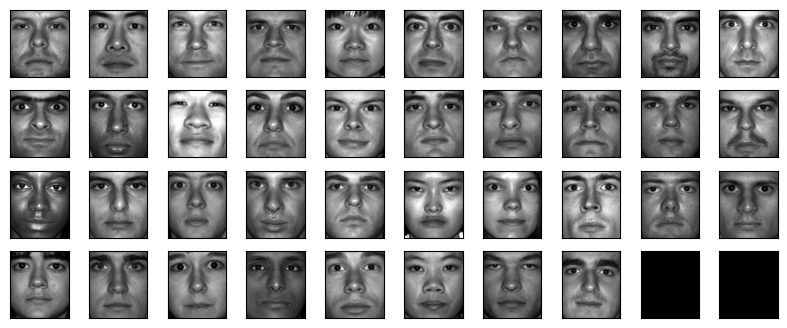

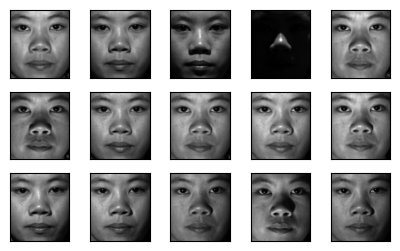

In [4]:
all_diff_persons = np.zeros((m*n, n_persons))
cnt = 0
for i in range(n_persons):
    all_diff_persons[:, i] = X[:, cnt]
    cnt = cnt + y[i]
    
show_montage(all_diff_persons, n, m, 4, 10)
#see all faces fir a single person

which_person = 35 #要看哪一個人
start_col = y[0:which_person].sum() #2218
end_col = start_col + y[which_person] #2282
show_montage(X[:, start_col:end_col], n, m, 3, 5)

In [28]:
from numpy.linalg import svd
X = D["faces"] # each column represents an image #32256*2410
avgFace = X.mean(axis=1).reshape(-1, 1)
X_avg = X - np.tile(avgFace, (1, X.shape[1]))
U, E, VT = svd(X_avg, full_matrices = False)
# U, E, VT = svd(X, full_matrices = False)

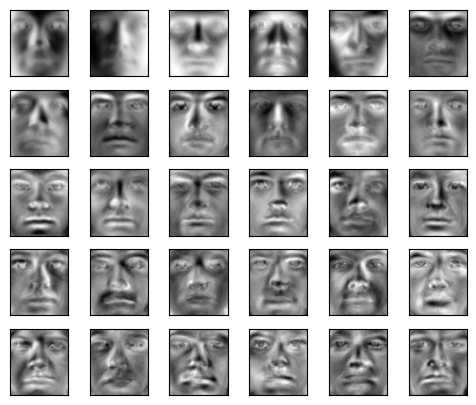

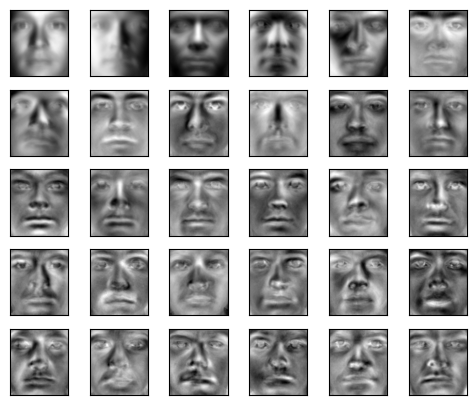

In [11]:
import matplotlib.pyplot as plt
show_montage(U, n, m, 5, 6)
#反面映射圖
show_montage(255 - U, n, m, 5, 6)

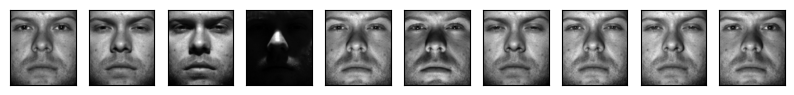

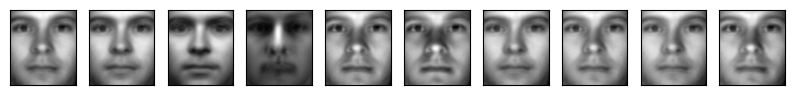

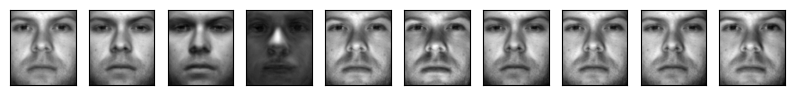

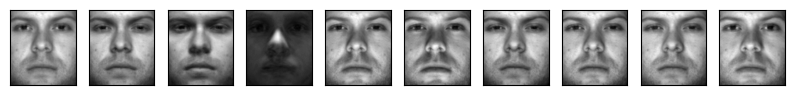

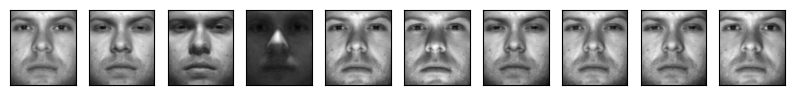

[60.2 12.   6.   3. ]


In [6]:
h, w = 1, 10
show_montage(X, n, m, h, w)
q = np.array([20, 100, 200, 400])
for i in q:
    Uq = U[:, :i]
    Xq = Uq @ (Uq.T @ X[:, :h * w])
    Xq = Xq + np.tile(avgFace, (1, Xq.shape[1]))
    show_montage(Xq, n, m, h, w)

compress_ratio = (X.shape[0] * X.shape[1]) / (X.shape[0] * q + q * X.shape[0])
print(np.round(compress_ratio, 1))

In [12]:
q = 100
x_new = X[:, np.sum(y[: 36])]
x = U[:, 0:q] @ (U[:, 0:q].T @ x_new) + avgFace
plt.imshow((x).reshape(168, 192).T, cmap = "gray")
plt.show()

ValueError: cannot reshape array of size 1040449536 into shape (168,192)

In [31]:
from numpy.linalg import svd
avgFace = X.mean(axis=1).reshape(-1, 1)
X_avg = X - np.tile(avgFace, (1, X.shape[1]))
U, E, VT = svd(X_avg, full_matrices = False)

In [29]:
from numpy.linalg import svd
#取 30 個人的所有圖像建立 U 矩陣，其他 8 人的圖像則作為測試之用
U_BASE = 30
U, E, VT = svd(X_avg[:, :np.sum(y[:U_BASE])], full_matrices = False)

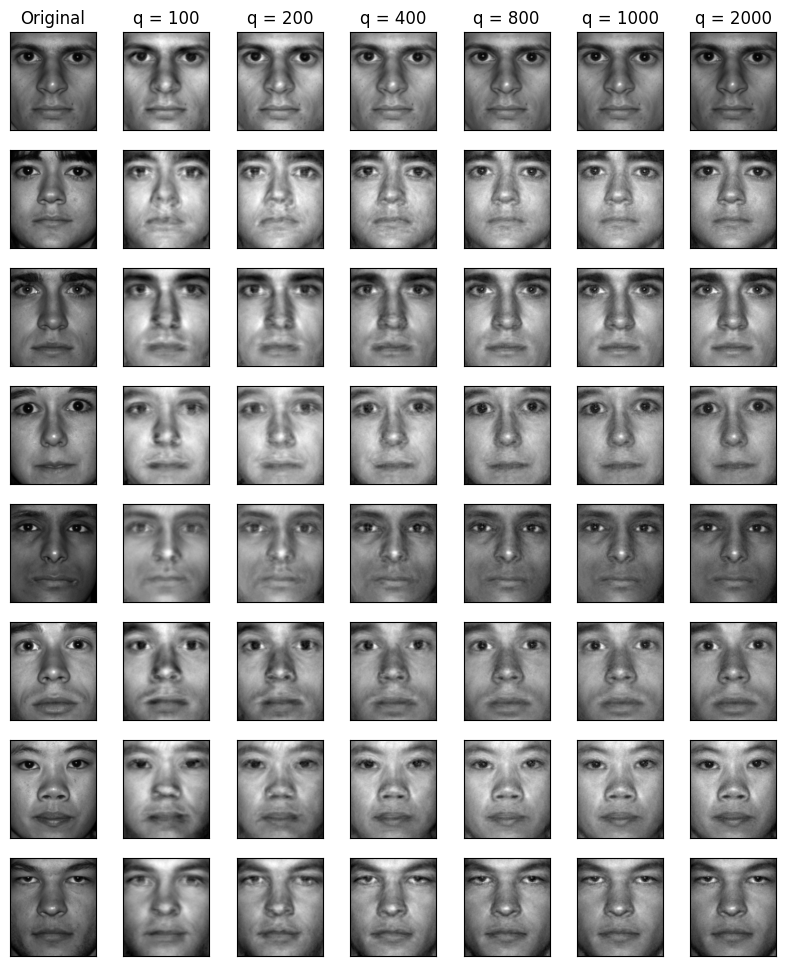

In [30]:
#假設 xnew 為一張新的人臉圖像，並沒有參與 U 的組成。我們是否仍可以用 Uq.T xnew 的方式加以保存，並以 Uq 加以復原嗎？
#如果可以，是否能以 38 人的 2410 張圖像所建立的 Uq 替10000 張其他人臉圖像作特徵圖像 Uqxnew，之後再以 Uq 回復？
#即 Uq 能將 (Uqxnew) 復原為 xnew？
q = np.array([100, 200, 400, 800, 1000, 2000])
new_pic = np.arange(30, 38, 1) # really new picture
#new_pic = np.arange(10, 18, 1) # pictures that participate in creating u

fig, ax = plt.subplots(len(new_pic), len(q)+1, figsize = (10, 12))
for i in range(len(new_pic)):
    x_new = X[:, np.sum(y[:(new_pic[i] - 1)])]
    ax[i][0].imshow((x_new).reshape(m, n).T, cmap = "gray")
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    ax[0][0].set_title("Original")

    for j, r in enumerate(q):
        x = U[:, 0:q[j]] @ (U[:, 0:q[j]].T @ x_new)
        ax[i][j+1].imshow(x.reshape(m, n).T, cmap = "gray")
        ax[i][j+1].set_xticks([])
        ax[i][j+1].set_yticks([])
        if i == 0:
            ax[i][j+1].set_title("q = {}".format(q[j]))

plt.show()

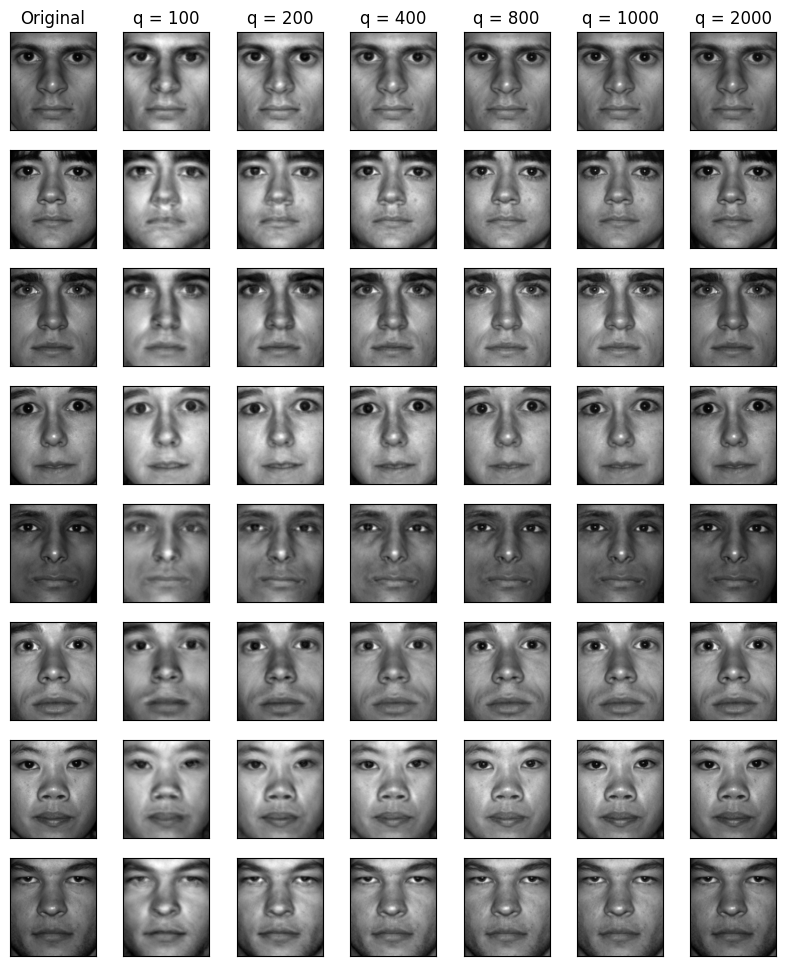

In [15]:
q = np.array([100, 200, 400, 800, 1000, 2000])
new_pic = np.arange(30, 38, 1) # really new picture

avgFace = X.mean(axis=1).reshape(-1, 1)
X_avg = X - np.tile(avgFace, (1, X.shape[1]))
U_BASE = 38
U, E, VT = svd(X_avg[:, :np.sum(y[:U_BASE])], full_matrices = False)

fig, ax = plt.subplots(len(new_pic), len(q)+1, figsize = (10, 12))
for i in range(len(new_pic)):
    x_new = X[:, np.sum(y[:(new_pic[i] - 1)])]
    ax[i][0].imshow((x_new).reshape(m, n).T, cmap = "gray")
    ax[i][0].set_xticks([])
    ax[i][0].set_yticks([])
    ax[0][0].set_title("Original")

    for j, r in enumerate(q):
        x = U[:, 0:q[j]] @ (U[:, 0:q[j]].T @ x_new)
        ax[i][j+1].imshow(x.reshape(m, n).T, cmap = "gray")
        ax[i][j+1].set_xticks([])
        ax[i][j+1].set_yticks([])
        if i == 0:
            ax[i][j+1].set_title("q = {}".format(q[j]))

plt.show()

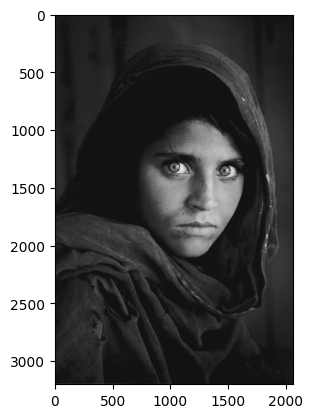

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 6592000 is different from 32256)

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

imgfile = "/Users/guoyixuan/Documents/pythoncode/ccwML/girl.jpeg"

img = mpimg.imread(imgfile)
if len(img.shape) > 2:
    img = np.mean(img, axis = 2) #convert RGB to grayscale

plt.imshow(img, cmap = "gray")
plt.show()
# x = U @ (U.T @ img.T.reshape(-1, 1))
q = 2000
x = U[:, 0:q] @ (U[:, 0:q].T @ img.T.reshape(-1, 1))
plt.imshow((x).reshape(m, n).T, cmap = "gray")
plt.show()